# Workshop 3 - Decisoin Tree

In [1]:
# Necessary Imports
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

# Instructions and Requirements:
## Instructions:
*   This week students will have assignments,as describe in the presentations (Please be advised assignments will be graded).
*   Goal is to make students friendly with Decision Tree algorithms,Random Forests, and also show case the hyper-parameter tuning.
*   Please find the datasets in the google drive folders
## Requirements:
    *   Notebook Environment(Jupyter or Google Colab)
    *   Students are expected to have following datasets: `diabetes.csv` and `play_tennis.csv`
    

# Week 3 Outline
*   Gentle Introduction to ID3 Algorithm:
  *   Calculate Entropy 
  *   Calculate Information Gain
*   Gentle Introduction to Decision Tree and Random Forest
  *   Implement RandomForest using SKlearn
  *   Perform Cross-validation
  *   Comparative analysis with and without hyper-parameter tuning
  *   List item





## Information Content
The _Shannon information_ or _information content_ is a measure of how surprising an event is. It is given by the following formula
$$ I(x) = \log_2 \frac{1}{P(\boldsymbol x=x)}\ = - \log_2 P(\boldsymbol x=x) $$
Mathematically we see that something that is completely certain ($P(\boldsymbol x=x)=1$) has no new information in it at all ($I(x)=0$). According to the definition, the more unlikely an event is, the more information it contains. The Shannon information is therefore also known as the _surprisal_.


### <font color="red"> $\bf{Task -I:}$

Implement a function,"information_content", to compute the information content in bits i.e. use log with base 2 based on above formula, given the probability$'p(x)'$ of an event.
  *   _Hint:_<br/>
  *   The log base 2 can be acessed through np.log2. 



In [40]:
def entropy(z):
    if len(z) == 0:
        return 0 
    else:
        ent = -np.log2(z)
        return ent
    
def information_content(p_x):
    """ Paramters:
  p_x: probability of an event x
  returns: Information content I 
  """
  ### Begin Solution
    I = -np.log2(p_x)
    return I
  ### End Solution

In [41]:
# Function Test or Sanity Check
assert information_content(0.5) == 1, "Danger Alert"

Remember the plot of surprisal vs probability from lecture:
  *   Let's Replicate the plot we saw in classroom:


In [7]:
# Helper Function
# Initial plotting function
def plot_function(function, inputs, title=None, ylabel=None):
    fig, ax = plt.subplots()
    ax.plot(inputs, function(inputs))
    if title:
        ax.set_title(title)
    ax.set_xticks(np.linspace(0, 1, 11))
    ax.set_xlabel("Probability of $x$")
    if ylabel:
        ax.set_ylabel(ylabel)
    plt.show()

### Plot a graph of the surprisal as a function the event probability


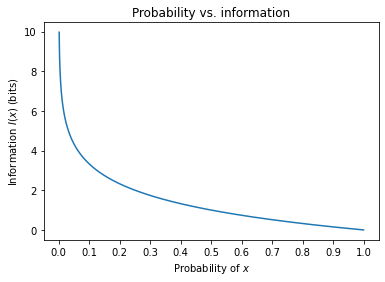

In [34]:
# Write your code to display figure below
p_x = np.linspace(1, 0, 1001, endpoint=False)[1:] # Probabilities on (0, 1)
plot_function(information_content, p_x, title="Probability vs. information", ylabel="Information $I(x)$ (bits)")

## Entropy and Informaton Gain
*   Entropy:
Entropy is a measure of the amount of uncertainty in the dataset S. Its mathematical Representation:
\begin{align}
        \mathbf{Entropy = H(X)} = \bf{-} [\sum_{i=1}^{\infty} p_i log_2 p_i ]
    \end{align}
  *   Further simplification(For binary classes No and Yes :
  \begin{align}
        \mathbf{H(X)} = \bf{-}p(Y) *log_2 (p(Y)) - p(N) * log_2(p(N))
    \end{align}
 
*   <font color="red"> $\bf{Task -II} $ 
  *   Lets find the Entropy of Given Dataset:
      *   Find the Entropy for Whole Dataset in it's current state.
     *   Find the Entropy for Each Attiributes of the datasets.



In [35]:
path = "./data/play_tennis.csv"
dataset = pd.read_csv(path)

In [36]:
dataset.head()

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


## Identify features and label and seperate it

In [11]:
# identify features and label and seperate it
features = dataset.iloc[:, :-1]
target = dataset.iloc[:,-1:]

# sanity check
assert features.shape[0] == target.shape[0], " len(features) == len(target)"

In [12]:
print(features)

     outlook  temp humidity    wind
0      Sunny   Hot     High    Weak
1      Sunny   Hot     High  Strong
2   Overcast   Hot     High    Weak
3       Rain  Mild     High    Weak
4       Rain  Cool   Normal    Weak
5       Rain  Cool   Normal  Strong
6   Overcast  Cool   Normal  Strong
7      Sunny  Mild     High    Weak
8      Sunny  Cool   Normal    Weak
9       Rain  Mild   Normal    Weak
10     Sunny  Mild   Normal  Strong
11  Overcast  Mild     High  Strong
12  Overcast   Hot   Normal    Weak
13      Rain  Mild     High  Strong


In [13]:
print(target)

   play
0    No
1    No
2   Yes
3   Yes
4   Yes
5    No
6   Yes
7    No
8   Yes
9   Yes
10  Yes
11  Yes
12  Yes
13   No


In [14]:
type(target)

pandas.core.frame.DataFrame

In [15]:
dataset['play'].unique()

array(['No', 'Yes'], dtype=object)

In [16]:
dataset['play'].value_counts()

Yes    9
No     5
Name: play, dtype: int64

### steps
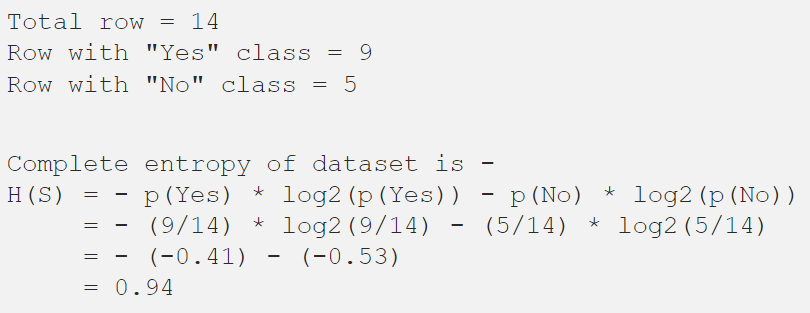

### Compute Entropy of Dataset

In [38]:
# write the code for missing place
tot = len(dataset)
tot_n = dataset[dataset["play"] == "No"].shape[0]
tot_y = dataset[dataset["play"] == "Yes"].shape[0]
prob_y = tot_y/tot
prob_n = tot_n/tot
print(prob_y, prob_n)
H_tot = -prob_y * np.log2(prob_y) - prob_n * np.log2(prob_n)
print(H_tot)

0.6428571428571429 0.35714285714285715
0.9402859586706311


### Steps:2
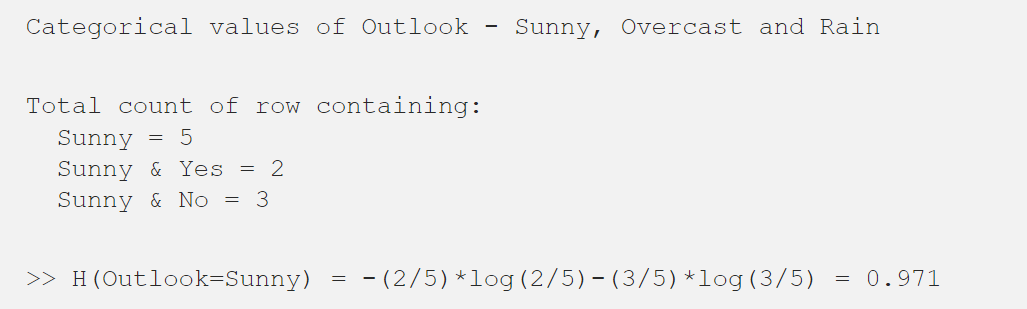

## Compute Entroyp of Each label of the Attribute `Outlook`

### `Sunny`

In [18]:
outlook = dataset["outlook"].unique()
sunny = dataset[dataset["outlook"] == "Sunny"]
#print(sunny.head())
tot_sunny = len(sunny)
tot_sunny_yes = sunny[sunny["play"] == "Yes"].shape[0]
tot_sunny_no = sunny[sunny["play"] == "No"].shape[0]
prob_sunny_yes = tot_sunny_yes/tot_sunny
prob_sunny_no = tot_sunny_no/tot_sunny
H_outlook_sunny = -prob_sunny_yes * np.log2(prob_sunny_yes) - prob_sunny_no * np.log2(prob_sunny_no)
print(H_outlook_sunny)

0.9709505944546686


# Find Out H(outlook=Rain) and H(outlook=overcast)
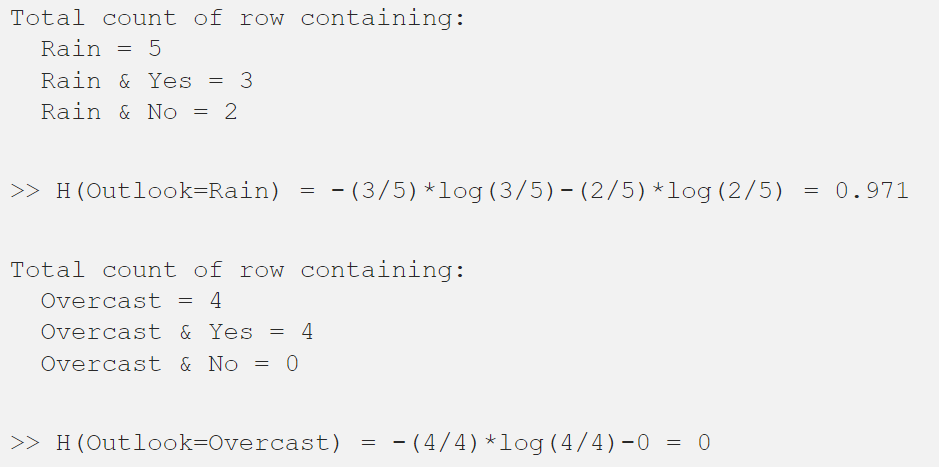

# Step:3: 
Calculate the Total Information for attributes Outlook:
   \begin{align}
        \mathbf{Entropy(T,X)} =  [\sum_{c=X} p(c)E(c) ]
    \end{align}

<font color="red"> $\bf{T: Current State}$ 
<font color="red"> $\bf{X: Current Attributes}$ 
  * In our example:
        *   Current State = H(play)
        *   X = Outlook
        *   I(Outlook) = p(sunny) * H(outlook=sunny) + p(Rain)*H(outlook=Rain) + p(Overcast) * H(outlook=Overcast)







In [19]:
# Find the solutions:
rain = dataset[dataset["outlook"] == "Rain"]
tot_rain = len(rain)
tot_rain_yes = rain[rain["play"] == "Yes"].shape[0]
tot_rain_no = rain[rain["play"] == "No"].shape[0]
prob_rain_yes = tot_rain_yes/tot_rain
prob_rain_no = tot_rain_no/tot_rain
H_outlook_rain = -prob_rain_yes * np.log2(prob_rain_yes) - prob_rain_no * np.log2(prob_rain_no)
print(H_outlook_rain)

0.9709505944546686


In [43]:
overcast = dataset[dataset["outlook"] == "overcast"]
tot_overcast = len(overcast)
tot_overcast_yes = overcast[overcast["play"] == "Yes"].shape[0]
tot_overcast_no = overcast[overcast["play"] == "No"].shape[0]
if tot_overcast != 0:
    prob_overcast_yes = tot_overcast_yes/tot_overcast
    prob_overcast_no = tot_overcast_no/tot_overcast
    H_outlook_overcast = -prob_overcast_yes * np.log2(prob_overcast_yes) - prob_overcast_no * np.log2(prob_overcast_no)
    
else:
    H_outlook_overcast = 0
print(H_outlook_overcast)

0


# Information Gain:
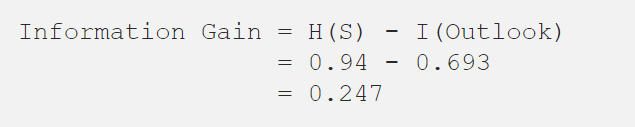

In [44]:
prob_sunny = tot_sunny/tot
prob_rain = tot_rain/tot
prob_overcast = tot_overcast/tot
I_outlook = prob_sunny * H_outlook_sunny + prob_rain * H_outlook_rain + prob_overcast * H_outlook_overcast
print(I_outlook)

0.6935361388961918


In [46]:
# Find the solution
IG = H_tot - I_outlook
IG

0.24674981977443933